In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [207]:
def clean_data(df):
    # Drop column: 'PCODE'
    df = df.drop(columns=['PCODE'])
    # Drop column: 'ADDRESS'
    df = df.drop(columns=['ADDRESS'])
    # Drop column: 'BLDGNAME'
    df = df.drop(columns=['BLDGNAME'])
    # Drop column: '_id'
    df = df.drop(columns=['_id'])
    # Drop column: 'LOC_NAME'
    df = df.drop(columns=['LOC_NAME'])
    return df

# Loaded variable 'df' from URI: /Users/anthonyh/Desktop/MI/2178/INF2178_A2_data.xlsx
df = pd.read_excel(r'/Users/anthonyh/Desktop/MI/2178/INF2178_A2_data.xlsx')

df_clean = clean_data(df.copy())
df_clean.head()

,LOC_ID,AUSPICE,ward,bldg_type,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1013,Non Profit Agency,3,Public Elementary School,0,20,32,52,60,164,Y,Y
1,1014,Non Profit Agency,8,Public Elementary School,0,0,12,26,45,83,Y,Y
2,1015,Non Profit Agency,25,Catholic Elementary School,0,10,16,26,50,102,Y,Y
3,1016,Non Profit Agency,10,Other,10,15,40,0,0,65,Y,Y
4,1017,Non Profit Agency,20,High Rise Apartment,0,10,16,0,0,26,Y,Y


In [208]:
# double check the data types of the columns and null values
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LOC_ID       1063 non-null   int64 
 1   AUSPICE      1063 non-null   object
 2   ward         1063 non-null   int64 
 3   bldg_type    1063 non-null   object
 4   IGSPACE      1063 non-null   int64 
 5   TGSPACE      1063 non-null   int64 
 6   PGSPACE      1063 non-null   int64 
 7   KGSPACE      1063 non-null   int64 
 8   SGSPACE      1063 non-null   int64 
 9   TOTSPACE     1063 non-null   int64 
 10  subsidy      1063 non-null   object
 11  cwelcc_flag  1063 non-null   object
dtypes: int64(8), object(4)
memory usage: 99.8+ KB


In [209]:
df_clean.describe()

,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


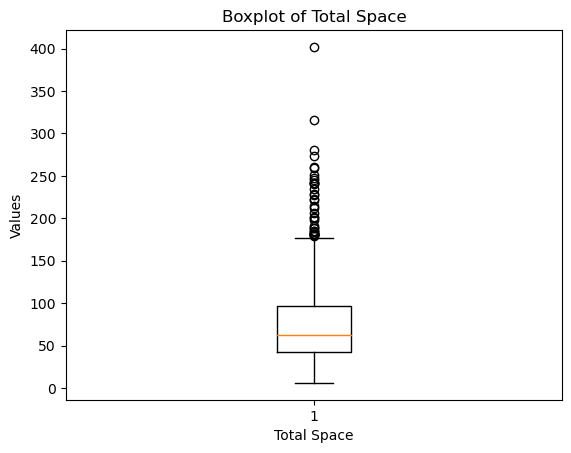

In [210]:
plt.boxplot(df_clean['TOTSPACE'])
plt.xlabel('Total Space')
plt.ylabel('Values')
plt.title('Boxplot of Total Space')
plt.show()


In [211]:
def remove_outliers_boxplot(df, column):
    # Calculate the interquartile range (IQR)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Create a boolean mask to identify outliers
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Remove outliers from the DataFrame
    df = df[~outlier_mask]
    
    return df
# Remove outliers from the 'TOTSPACE' column  
df_clean = remove_outliers_boxplot(df_clean, 'TOTSPACE')


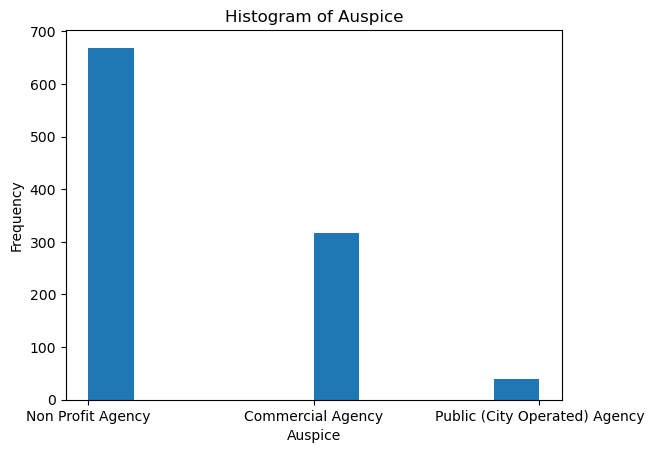

In [212]:
# count auspice
plt.hist(df_clean['AUSPICE'])
plt.xlabel('Auspice')
plt.ylabel('Frequency')
plt.title('Histogram of Auspice')
plt.show()


NameError: name 'ptl' is not defined

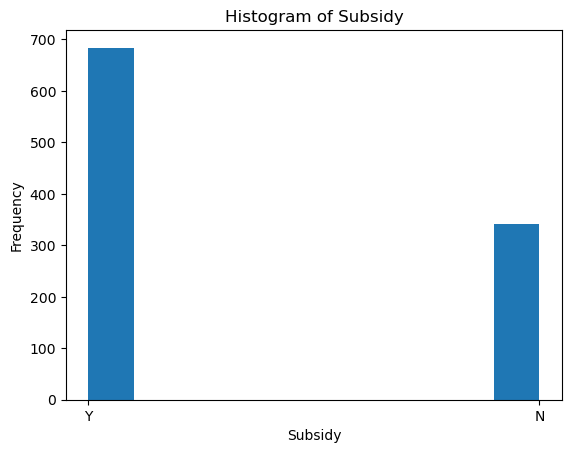

In [213]:
plt.hist(df_clean['subsidy'])
plt.xlabel('Subsidy')
plt.ylabel('Frequency')
plt.title('Histogram of Subsidy')
ptl.show()


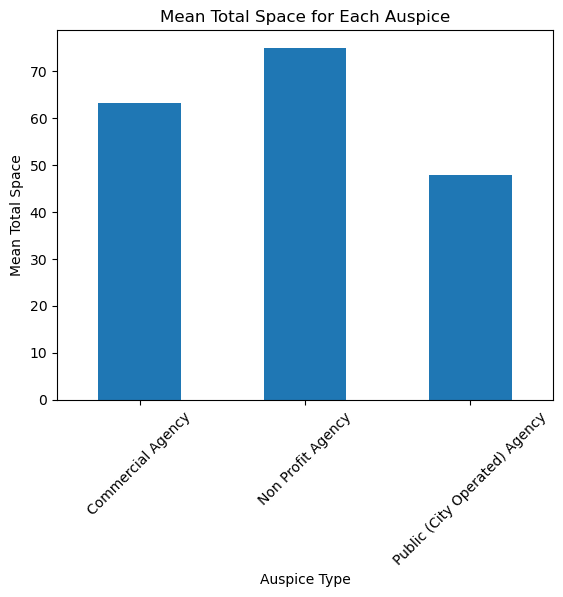

In [ ]:
# show mean TOTSPACE for different auspice
df_clean.groupby('AUSPICE')['TOTSPACE'].mean().plot(kind='bar')
plt.xlabel('Auspice Type')
plt.ylabel('Mean Total Space')
plt.title('Mean Total Space for Each Auspice')
plt.xticks(rotation=45)  # Twist the x-axis labels by 45 degrees
plt.show()


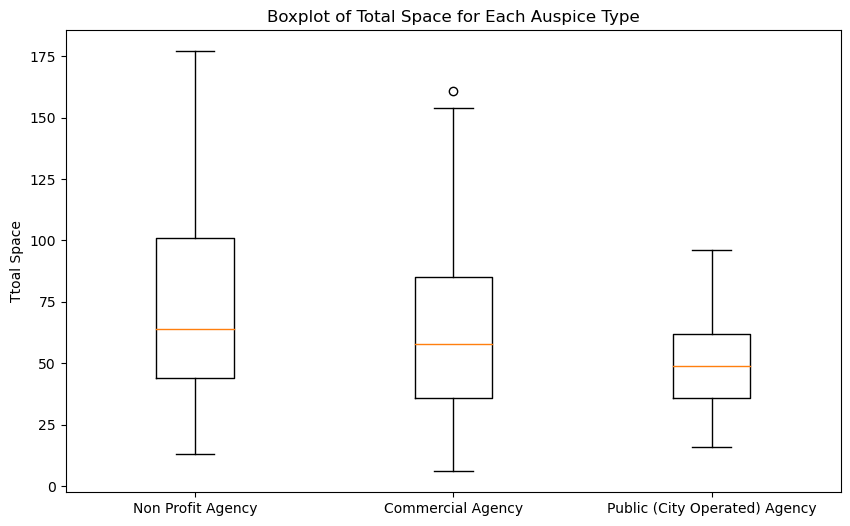

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a boxplot for each auspice
plt.boxplot([df_clean[df_clean['AUSPICE'] == auspice]['TOTSPACE'] for auspice in df_clean['AUSPICE'].unique()])

# Set the x-axis labels
plt.xticks(range(1, len(df_clean['AUSPICE'].unique()) + 1), df_clean['AUSPICE'].unique())

# Set the y-axis label
plt.ylabel('Ttoal Space')

# Set the title
plt.title('Boxplot of Total Space for Each Auspice Type')

# Show the plot
plt.show()


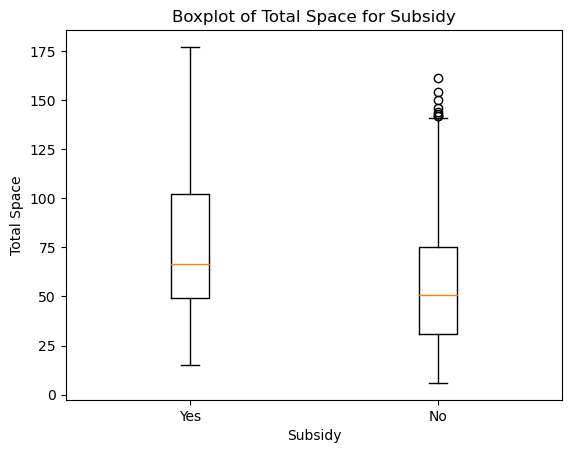

In [ ]:
plt.boxplot([df_clean[df_clean['subsidy'] == 'Y']['TOTSPACE'], df_clean[df_clean['subsidy'] == 'N']['TOTSPACE']])
plt.xlabel('Subsidy')
plt.ylabel('Total Space')
plt.title('Boxplot of Total Space for Subsidy')
plt.xticks([1, 2], ['Yes', 'No'])
plt.show()


In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
model = ols('TOTSPACE ~ C(AUSPICE)', data=df_clean).fit()
w, pvalue = stats.shapiro(model.resid)
print(f'result of shapiro test: {w,pvalue}')

#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res = stat()
res.levene(df=df_clean, res_var='TOTSPACE', xfac_var='AUSPICE')
print('reuslt of levene test: ')
res.levene_summary

result of shapiro test: (0.9491209983825684, 2.4889163596151464e-18)
reuslt of levene test: 


,Parameter,Value
0,Test statistics (W),14.9703
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [ ]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(AUSPICE),5.046271e+04,2.0,17.716959,2.729002e-08
Residual,1.455467e+06,1022.0,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_clean, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary


/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,11.806717,5.767004,17.846431,6.488924,0.001000
1,Non Profit Agency,Public (City Operated) Agency,27.160515,12.569289,41.751742,6.178827,0.001000
2,Commercial Agency,Public (City Operated) Agency,15.353798,0.322946,30.384650,3.390721,0.043983


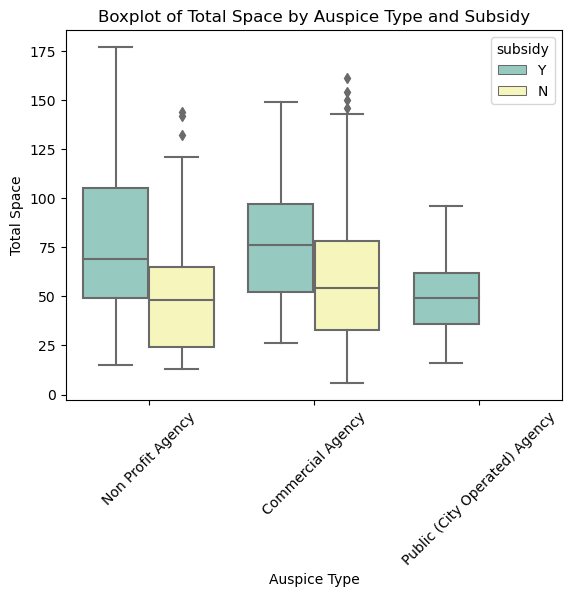

In [ ]:
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", data=df_clean, palette="Set3")
plt.xlabel('Auspice Type')
plt.ylabel('Total Space')
plt.title('Boxplot of Total Space by Auspice Type and Subsidy')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Fit the two-way ANOVA model
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df_clean).fit()

# perfrom shapiro test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test statistic:", w)
print("p-value:", pvalue)

# Perform Levene's test
statistic, pvalue = levene(df_clean[df_clean['AUSPICE'] == 'Commercial Agency']['TOTSPACE'],
                           df_clean[df_clean['AUSPICE'] == 'Non Profit Agency']['TOTSPACE'],
                           df_clean[df_clean['AUSPICE'] == 'Public (City Operated) Agency']['TOTSPACE'],
                           df_clean[df_clean['subsidy'] == 'Y']['TOTSPACE'],
                           df_clean[df_clean['subsidy'] == 'N']['TOTSPACE'])

# Print the results
print("Levene's test statistic:", statistic)
print("p-value:", pvalue)


Shapiro-Wilk test statistic: 0.9479749202728271
p-value: 1.5315137372036613e-18
Levene's test statistic: 11.02305686626293
p-value: 7.60311963065639e-09


In [ ]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD test
res = stat()
res.tukey_hsd(df=df_clean, res_var='TOTSPACE', xfac_var=['AUSPICE', 'subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary



                             sum_sq      df          F        PR(>F)
C(AUSPICE)             2.026500e+03     2.0   0.757258  4.692140e-01
C(subsidy)             6.001180e+04     1.0  44.850144  3.508106e-11
C(AUSPICE):C(subsidy)  3.882915e+04     2.0  14.509586  6.117030e-07
Residual               1.364813e+06  1020.0        NaN           NaN


/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/bioinfokit/analys.py:905: RuntimeWarning: divide by zero encountered in divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/bioinfokit/analys.py:913: RuntimeWarning: divide by zero encountered in divide
  np.divide(1, group2_count)))))
/Users/anthonyh/miniforge3/envs/cpsc330/lib/python3.10/site-packages/bioinfokit/analys.py:916: RuntimeWarning: divide by zero encountered in divide
  np.divide(1, grou

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",28.721291,17.443140,39.999441,10.282633,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",2.148962,-10.533980,14.831904,0.684143,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",20.632512,12.591965,28.673058,10.361074,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",31.496614,14.208503,48.784725,7.356218,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",26.572329,10.772091,42.372566,6.790539,0.001000
6,"(Non Profit Agency, N)","(Commercial Agency, N)",8.088779,-4.298347,20.475905,2.636639,0.426903
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",2.775324,-16.913995,22.464643,0.569143,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",18.483550,4.805055,32.162045,5.456138,0.001691


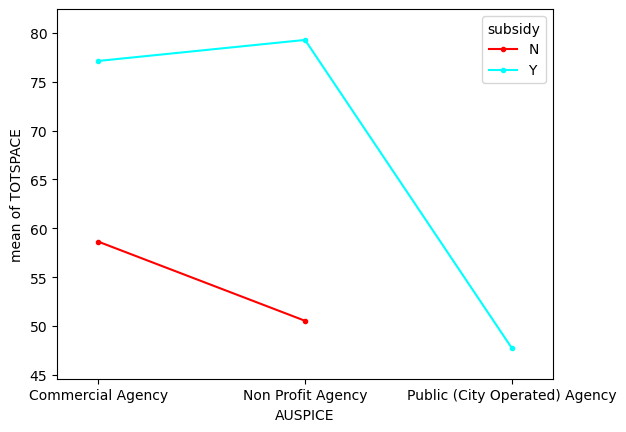

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df_clean['AUSPICE'],trace=df_clean['subsidy'],response=df_clean['TOTSPACE'])
plt.show()